In [6]:
import os 
import tarfile
from six.moves import urllib
import pandas as pd

In [7]:
DOWNLOAD_ROOT= "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

In [9]:
def load_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)


In [10]:
housing = load_data()

In [11]:
X = load_data()

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

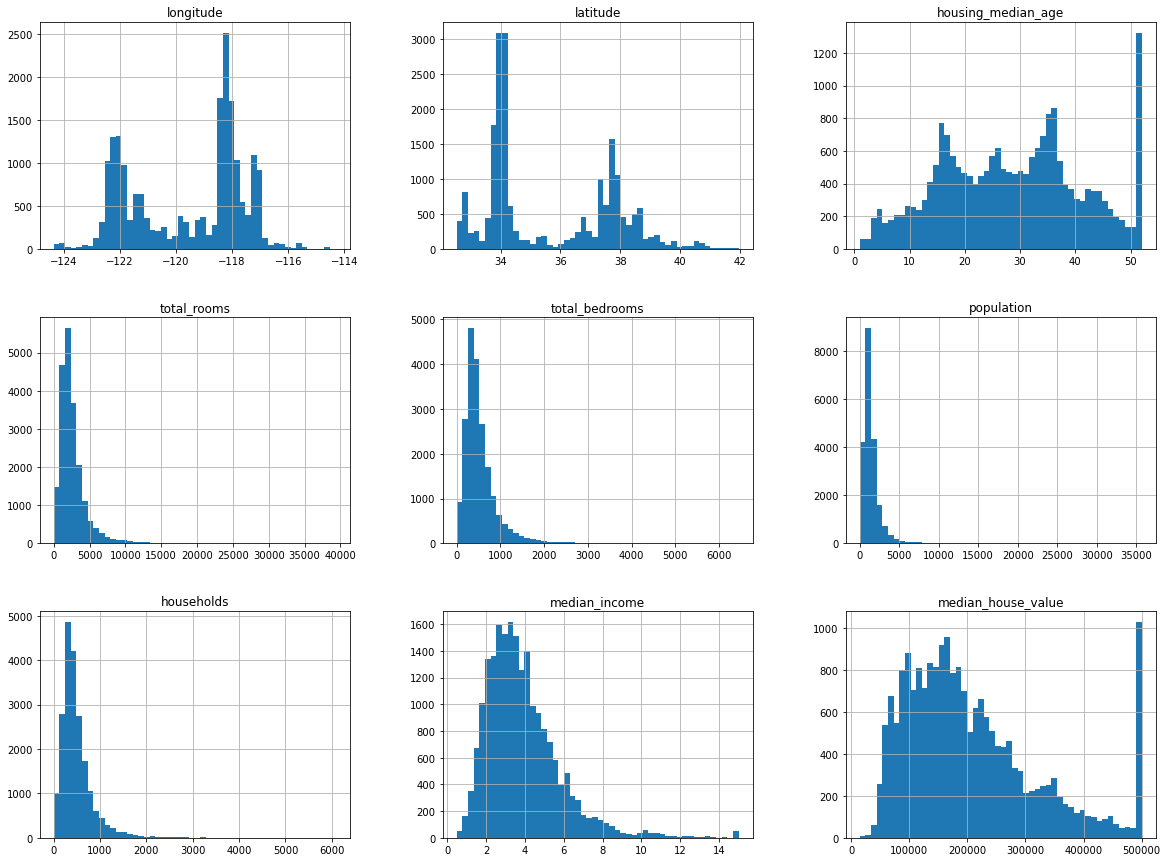

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt 

housing.hist(bins = 50, figsize=(20,15))

In [17]:
import numpy as np

def split_train_test(data, test_ratio = 0.33):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = split_train_test(housing,0.2)
print(len(train_set), len(test_set))

16512 4128


In [19]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [20]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [21]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing['income_cat'].max()

5.0

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [25]:
strat_train_set['median_income'].max()

15.0001

In [26]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

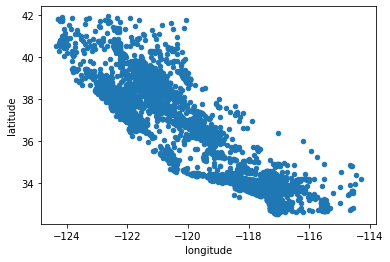

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

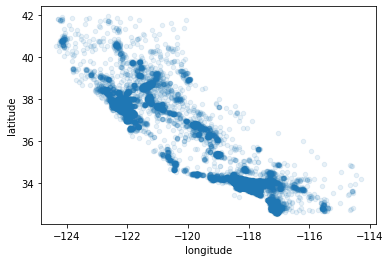

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

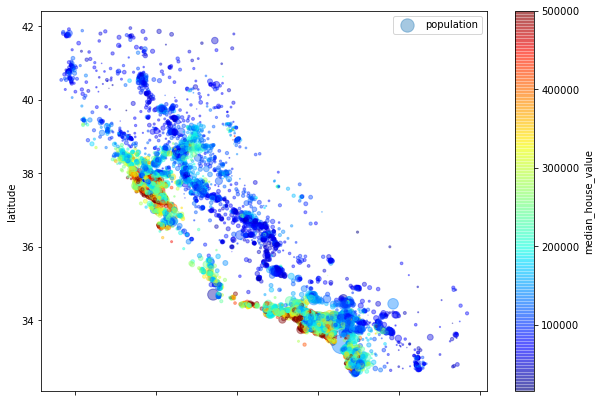

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    ) 

plt.legend()

In [30]:
corr_matrix = housing.corr()

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

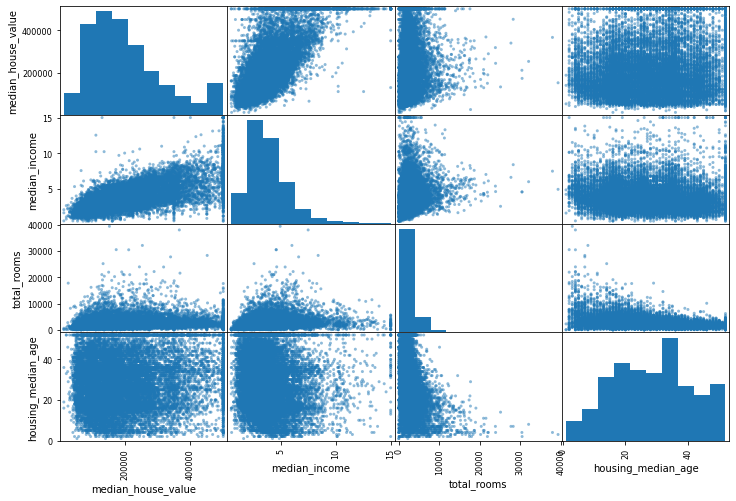

In [32]:
attributes = ["median_house_value", "median_income", "total_rooms",
    "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

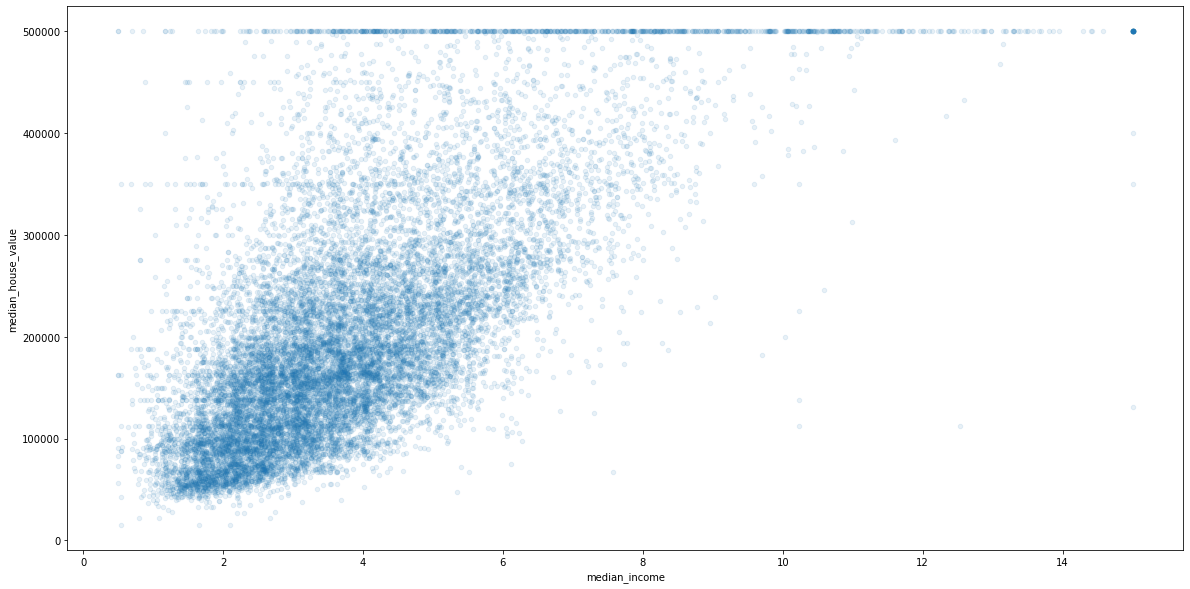

In [33]:
housing.plot(kind = 'scatter', x = 'median_income',y='median_house_value', alpha=0.1, figsize=(20,10))

Look at the lines presented in the cap{50000} and also there are a few lines in {35000} and so on. Try to remove this lines to avoid the data quirk in the algorithm

In [34]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [35]:
corr_matrix = housing.corr()

In [36]:
corr_matrix['median_house_value'].sort_values(ascending =False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [37]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [38]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="median")


In [40]:
housing_num = housing.drop('ocean_proximity', axis = 1)

In [41]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [43]:
X = imputer.transform(housing_num) #This gives a plain numpy array

In [44]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)


In [46]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [47]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [48]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

This spars matrix comes handy due to the usual size of it. It just stores the nonzero values. 
To convert it to a numpy array again just use .toarray()

In [49]:
housing_cat_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [53]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [54]:
labeled = MyLabelBinarizer()

In [ ]:
labeled_1 = labeled.fit_transform(housing_cat)

In [ ]:
labeled_1

Both transformations can be done in one step with the following

In [52]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_labelB = encoder.fit_transform(housing_cat)
housing_cat_labelB

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y = None):
        rooms_per_household = X[:,room_ix] / X[:, household_ix]
        population_per_household = X[:,population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:, room_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
        


In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)

In [ ]:
housing_extra_atrribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_atrribs[:5]

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')), 
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values
    

In [58]:
num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']

num_pipeline= Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy = 'median')), 
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline= Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('encoder',  MyLabelBinarizer())
])

In [59]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline",num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [60]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared[1]

In [ ]:
num_attributes

# Training and Evaluation on the Training set


In [61]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [62]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)


In [63]:
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labeles: ", list(some_labels))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labeles:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [64]:
from sklearn.metrics import mean_squared_error

Y_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(Y_pred, housing_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [65]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(housing_prepared, housing_labels)
tree_predictions = tree.predict(housing_prepared)
tree_mse = mean_squared_error(tree_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [67]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [69398.59199306 66464.82896442 70450.97846877 69355.25439253
 71890.92485143 74194.41134551 70236.69630511 71042.02754404
 77764.83797553 70139.57244277]
Mean: 71093.8124283186
Standard deviation: 2900.6321235453606


In [68]:
from sklearn.ensemble import RandomForestRegressor
forest  = RandomForestRegressor()
forest.fit(housing_prepared, housing_labels)
forest_predictions = forest.predict(housing_prepared)
forest_mse = mean_squared_error(forest_predictions, housing_labels)
forest_rmse = np.sqrt(tree_mse)
print(forest_rmse)
scores_forest = cross_val_score(forest, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores_forest)
display_scores(forest_rmse_scores)

0.0
Scores: [49375.61231471 47279.95079479 49789.29290698 51835.90889232
 49386.26854546 53560.86644237 49103.15779507 47953.02967915
 53352.86499663 50410.67300571]
Mean: 50204.76253732083
Standard deviation: 2006.1259977940933


In [ ]:
import joblib

joblib.dump(tree, "tree_1.pkl")

In [ ]:
tree_loaded = joblib.load("tree_1.pkl")

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
    scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [70]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [72]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [73]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64264.84057079281 {'max_features': 2, 'n_estimators': 3}
55733.41603007926 {'max_features': 2, 'n_estimators': 10}
52998.86171334894 {'max_features': 2, 'n_estimators': 30}
59913.26423179418 {'max_features': 4, 'n_estimators': 3}
53298.55901999569 {'max_features': 4, 'n_estimators': 10}
50558.71598322425 {'max_features': 4, 'n_estimators': 30}
59374.55707858636 {'max_features': 6, 'n_estimators': 3}
52063.56940828732 {'max_features': 6, 'n_estimators': 10}
50244.441708684026 {'max_features': 6, 'n_estimators': 30}
58521.011066587394 {'max_features': 8, 'n_estimators': 3}
51943.51672670238 {'max_features': 8, 'n_estimators': 10}
50035.016934830994 {'max_features': 8, 'n_estimators': 30}
62630.1328052707 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54472.65393372075 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60024.07392286074 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51902.70886416493 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [86]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.78980316e-02, 6.20844840e-02, 4.77758893e-02, 1.55319798e-02,
       1.49901569e-02, 1.53070322e-02, 1.44447030e-02, 3.77955617e-01,
       4.07362445e-02, 1.13185766e-01, 7.42432054e-02, 4.62277519e-03,
       1.44293228e-01, 1.22109509e-04, 3.36912819e-03, 3.43964948e-03])

In [89]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3779556168400186, 'median_income'),
 (0.1442932281280012, 'INLAND'),
 (0.11318576596713849, 'pop_per_hhold'),
 (0.07424320544076249, 'bedrooms_per_room'),
 (0.06789803158409319, 'longitude'),
 (0.06208448403051706, 'latitude'),
 (0.04777588928311052, 'housing_median_age'),
 (0.04073624447850742, 'rooms_per_hhold'),
 (0.015531979822481484, 'total_rooms'),
 (0.015307032152036128, 'population'),
 (0.014990156929288628, 'total_bedrooms'),
 (0.014444702979720534, 'households'),
 (0.004622775188121342, '<1H OCEAN'),
 (0.003439649481898558, 'NEAR OCEAN'),
 (0.003369128185104919, 'NEAR BAY'),
 (0.0001221095091994202, 'ISLAND')]

In [90]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [91]:
final_rmse

48426.319290964515

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
rf_random = RandomizedSearchCV(scoring="neg_mean_squared_error",estimator = forest_reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 28.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [83]:
rf_random.best_params_

{'n_estimators': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [84]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      n_estimators=180)

In [92]:
feature_importances_rand = rf_random.best_estimator_.feature_importances_
feature_importances_rand

array([8.66839330e-02, 8.02908665e-02, 4.15796954e-02, 2.18124147e-02,
       1.91720893e-02, 2.19467199e-02, 1.91438390e-02, 2.81991827e-01,
       6.83484387e-02, 1.01655001e-01, 9.14578203e-02, 1.33053919e-02,
       1.42453731e-01, 6.73017295e-05, 4.29846705e-03, 5.79246249e-03])

In [93]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances_rand, attributes), reverse=True)

[(0.2819918272028343, 'median_income'),
 (0.1424537313988108, 'INLAND'),
 (0.10165500143082894, 'pop_per_hhold'),
 (0.09145782025169451, 'bedrooms_per_room'),
 (0.08668393297087222, 'longitude'),
 (0.08029086645792707, 'latitude'),
 (0.06834843867236721, 'rooms_per_hhold'),
 (0.041579695434134034, 'housing_median_age'),
 (0.02194671987318744, 'population'),
 (0.02181241473118459, 'total_rooms'),
 (0.019172089336631976, 'total_bedrooms'),
 (0.019143839039440724, 'households'),
 (0.013305391930685674, '<1H OCEAN'),
 (0.005792462488051047, 'NEAR OCEAN'),
 (0.004298467051878041, 'NEAR BAY'),
 (6.730172947155544e-05, 'ISLAND')]

In [95]:
final_model = rf_random.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [96]:
final_rmse

46191.73441016617

In [97]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

In [98]:
full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

# Homework


1. Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as
kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various
values for the C and gamma hyperparameters). Don’t worry about what these hyperparameters mean
for now. How does the best SVR predictor perform?
2. Try replacing GridSearchCV with RandomizedSearchCV.
3. Try adding a transformer in the preparation pipeline to select only the most important attributes.
4. Try creating a single pipeline that does the full data preparation plus the final prediction.
5. Automatically explore some preparation options using GridSearchCV.

https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

In [99]:
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F81C15C630>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F81C1E9780>},
                   random_state=42, scoring='neg_mean_squared_error')